<a href="https://colab.research.google.com/github/ArulselvanMadhavan/CSC508/blob/add-license-1/1_DecisionTree_Cleveland_CSC508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the Decision Tree Cleveland Data Notebook! 

I like decision trees because they are easier to understand than most other machine learning or statistics methods. This notebook was created by Vaisakh Kusabhadran, Amisha Dhawan, Yuomi Zavaleta (all SFSU students) and Pleuni Pennings (SFSU bio professor).

The goal of this notebook is to create a decision tree for the Cleveland heart disease data set. This dataset is actually quite old, and it is sort of a classic dataset for learning ML methods. The dataset has a lot of variables that are measured for a few hundred patients, and the goal is to predict whether or not the patient has at least one vessel with >50% diameter narrowing. 

More information about the data set and about why we want to make a decision tree can be found in the (notes for Class 508) https://docs.google.com/document/d/1TjrEe7RbzQYZgucPjfZMARCCk9kIkNQMoczfu0YR4ss/edit?usp=sharing


#Preparing libraries and data

Here we importing all the necessary libraries – we'll explain what they do later when we use them. Test. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

Here we create a list of the column names, taken from the [UCI website](https://archive.ics.uci.edu/ml/datasets/heart+disease).


<ul type = "square">
<li>#3 age: age in years</li>
<li>#4 sex: sex (1 = male; 0 = female)</li>
<li>#9 chestpaintype
<ul>
<li>Value 1: typical angina
<li>Value 2: atypical angina
<li>Value 3: non-anginal pain
<li>Value 4: asymptomatic</li>
</ul>
<li>#10 At_rest_bp: resting blood pressure (in mm Hg on admission to the hospital)</li>
<li>#12 Cholesterol: serum cholestoral in mg/dl </li>
<li>#16 Fast_blood_sug: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
<li>#19 Rest_ecg: resting electrocardiographic results
<ul>
<li>Value 0: normal
<li>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
<li>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria</li>
</ul>
<li>#32 Maxhr: thalach: maximum heart rate achieved</li>
<li>#38 Exer_angina: exang: exercise induced angina (1 = yes; 0 = no)</li>
<li>#40 Oldpeak: ST depression induced by exercise relative to rest </li>
<li>#41 Slope: the slope of the peak exercise ST segment
<ul>
<li> Value 1: upsloping</li>
<li> Value 2: flat</li>
<li> Value 3: downsloping</li>
</ul>
<li>#44 Ca: number of major vessels (0-3) colored by flourosopy</li>
<li>#51 Thal: Thallium or stress test 3 = normal; 6 = fixed defect; 7 = reversable defect. 
</li>
<li>#58 Diag: num: diagnosis of heart disease (angiographic disease status)
<ul>
<li>Value 0: no vessel with 50% diameter narrowing</li>
<li>Value 1: one vessel with 50% diameter narrowing</li>
<li>Value 2,3,4: 2,3,4 vessels with 50% diameter narrowing</li>
</ul>
</li>
</ul>

[See this website for more info on the thallium or stress test](https://www.healthline.com/health/thallium-stress-test).

In [ ]:
columns = ["Age","Sex","Chest_pain_type","At_rest_bp","Cholesterol","Fast_blood_sug","Rest_ecg","Maxhr","Exer_angina","Oldpeak","Slope","Ca","Thal","Diag"]

Fetch the dataset from the github repository and add the column names. We are getting the data here from Vaisakh's github repository, but we can also find the data [here](https://archive.ics.uci.edu/ml/datasets/heart+disease). 
The data are stored in a pandas data frame called "features". 
If you have not heard of the pandas package, it is worth looking it up! 


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/pleunipennings/CSC508Data/main/processed.cleveland.data.txt',header=None,names=columns )

Let's look at the data. If you just type the name of the pandas dataframe, the beginning and the end of the data frame will be displayed. 

In [ ]:
data

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak,Slope,Ca,Thal,Diag
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


The describe() function gives you an overview of the dataframe. 

In [ ]:
data.describe()

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak,Slope,Diag
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


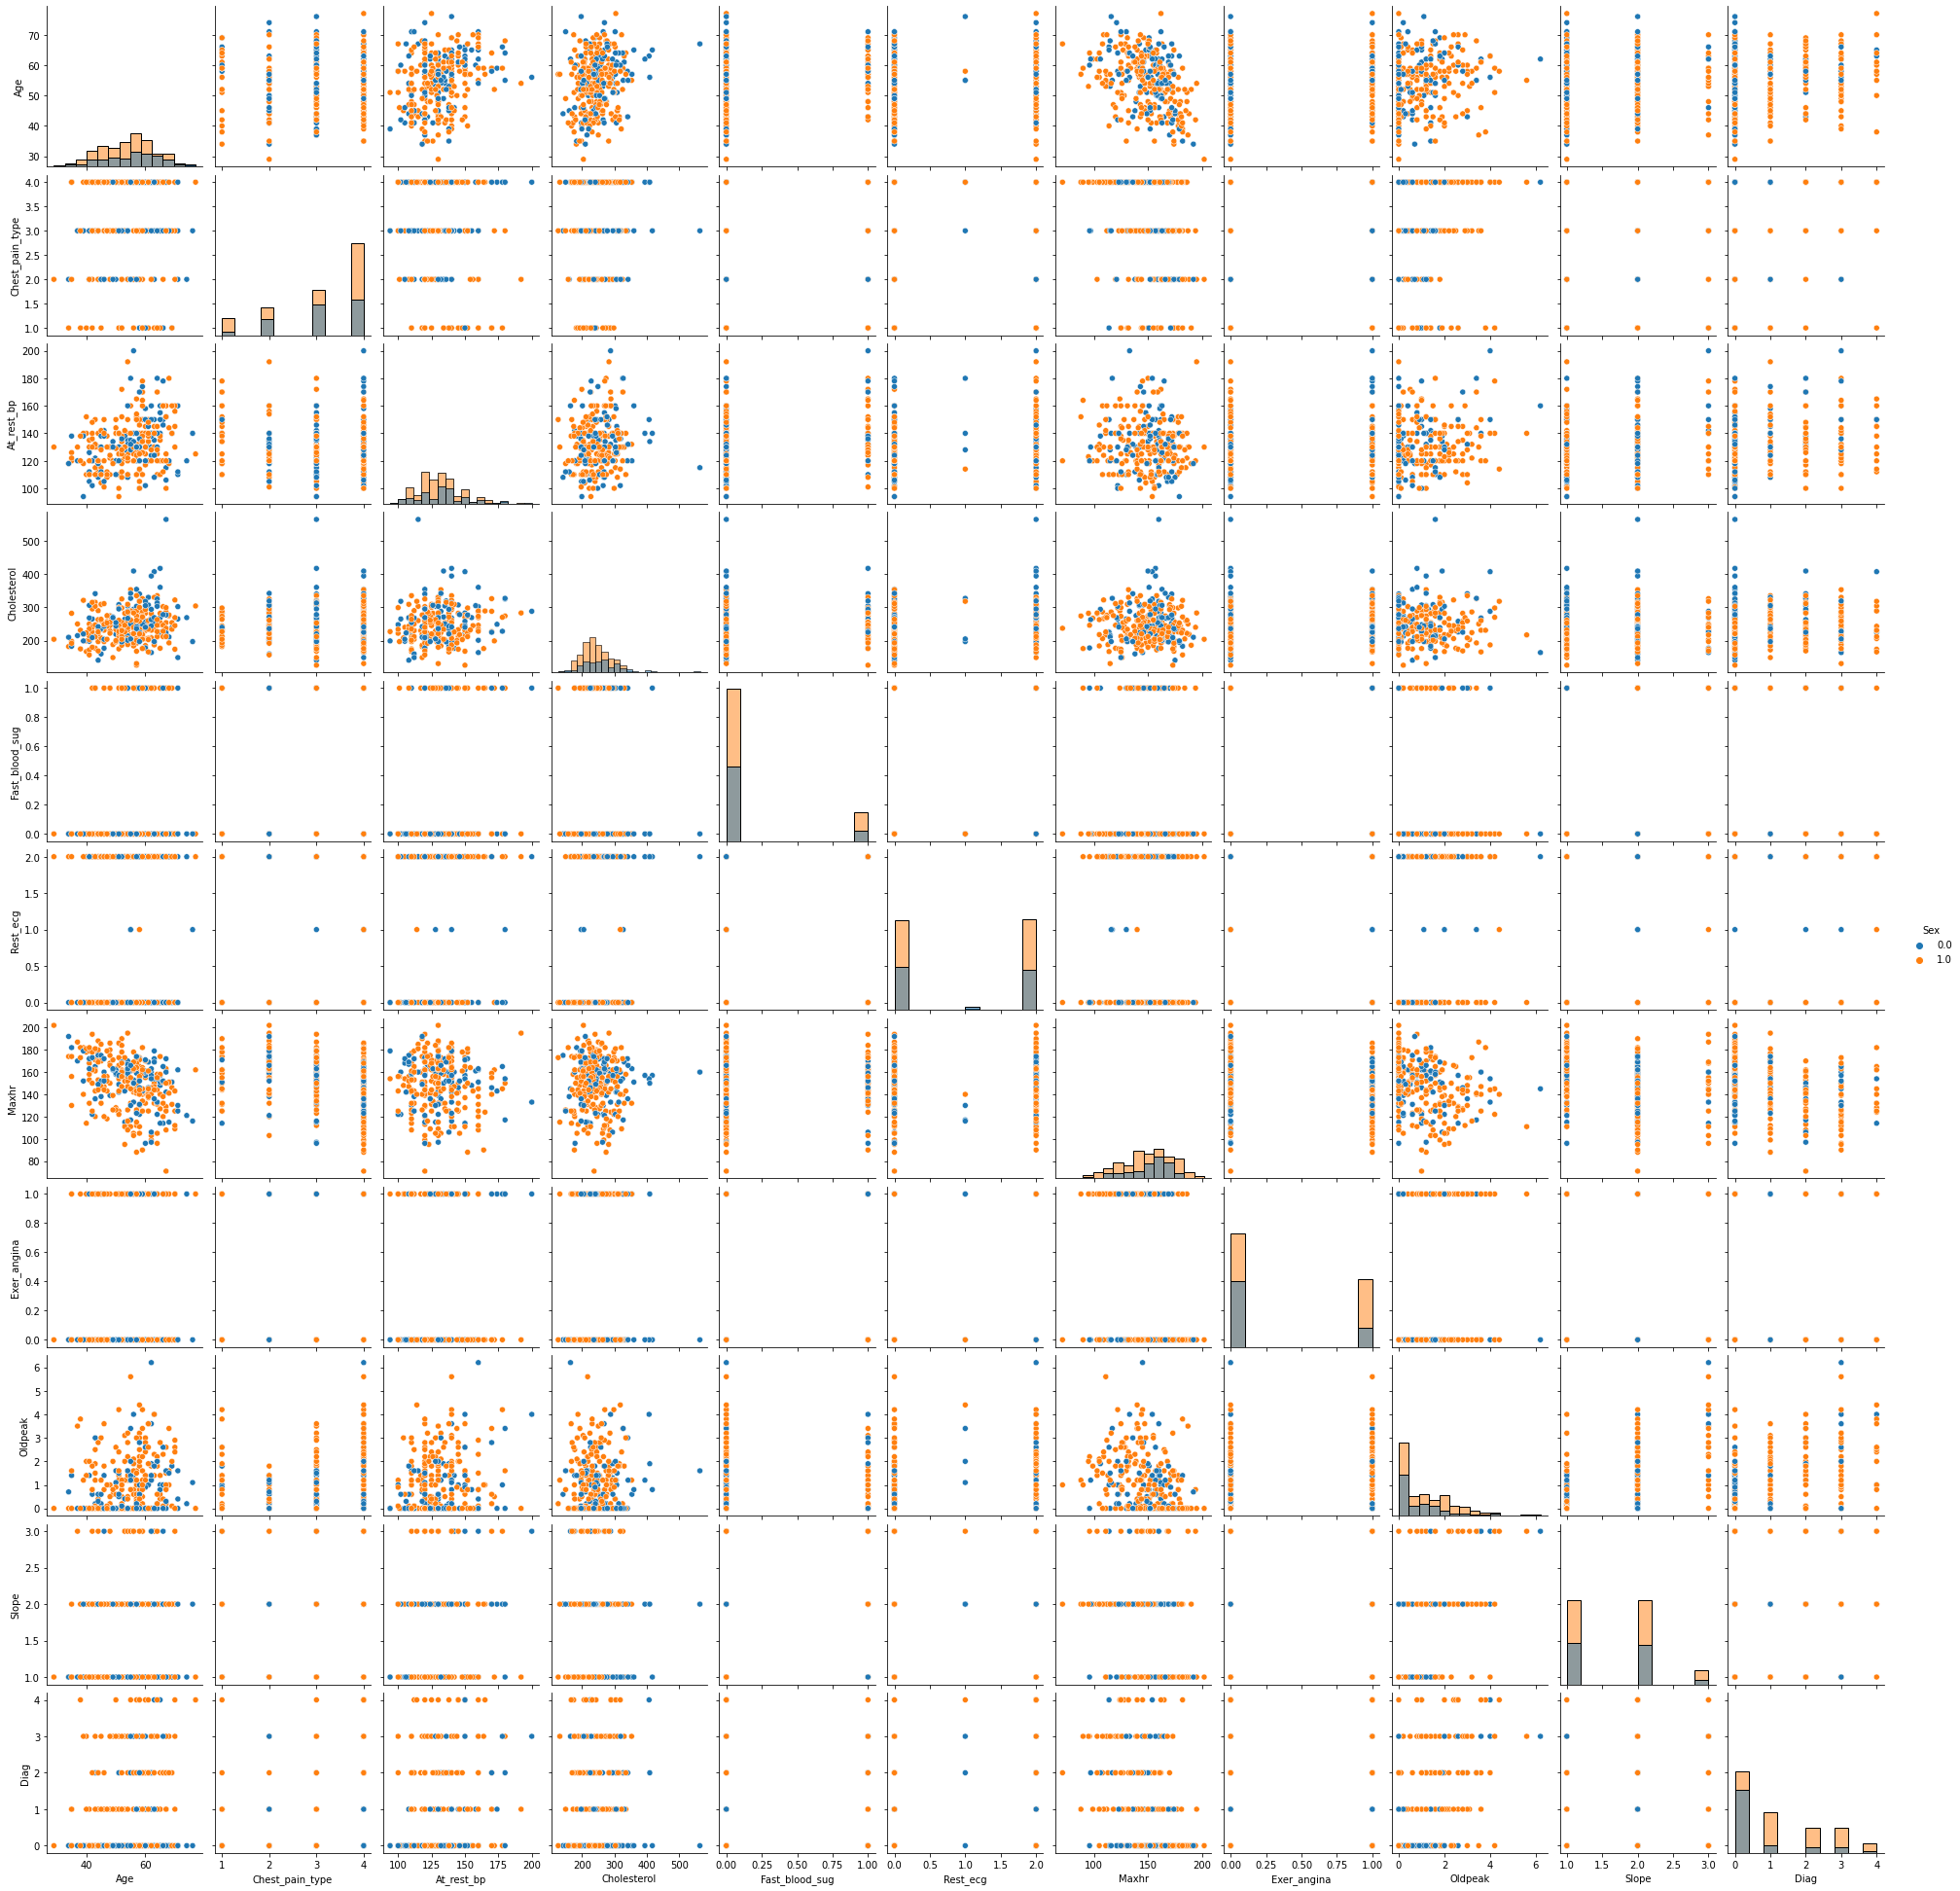

In [ ]:
import seaborn as sns
sns.pairplot(data, diag_kind = 'hist', hue = "Sex")

The value_counts() function tells us how often each value occurs. 

In [ ]:
data["Diag"].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: Diag, dtype: int64

Use dtypes() function to look at the data types. 

In [ ]:
data.dtypes

Age                float64
Sex                float64
Chest_pain_type    float64
At_rest_bp         float64
Cholesterol        float64
Fast_blood_sug     float64
Rest_ecg           float64
Maxhr              float64
Exer_angina        float64
Oldpeak            float64
Slope              float64
Ca                  object
Thal                object
Diag                 int64
dtype: object

# Assignment 1: looking at the data

1.   Each row has data for one patient. How many patients are there in the dataset? 
2.   Are there any columns that have missing data? Which columns and how many missing values? 
3. Look at the datatypes of all columns. Why do you think "Ca" and "Thal" have datatype "object" whereas all the others have float64 or int64? 
4. The "Diag" column holds the actual diagnosis for the patient. 0 means that had no vessels that were >50% constricted. 1, 2, 3, 4 means they had 1, 2, 3, or 4 constricted vessels. How many patients had at least one constricted vessel? 
5. Look at the sns pairplot we made a few cells ago. Do you see any variable that is clearly correlated with age? If so, which? 


# Dealing with missing data
Next, we are going to do some work to deal with the missing data. 
Identify the columns having missing values


In [ ]:
(data=='?').sum()

Age                0
Sex                0
Chest_pain_type    0
At_rest_bp         0
Cholesterol        0
Fast_blood_sug     0
Rest_ecg           0
Maxhr              0
Exer_angina        0
Oldpeak            0
Slope              0
Ca                 4
Thal               2
Diag               0
dtype: int64

Here we will display the rows that have missing values. 

In [ ]:
missing_values = data.loc[(data['Thal'] == "?") | (data['Ca'] == "?")]
missing_values

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak,Slope,Ca,Thal,Diag
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


There are different ways to deal with missing data. Here we will replace the missing values with the mean for the column. 

* Replace the missing values(?) with nan. 
* Replace nan with the median for the column. 
* Verify there are no more missing values

In [ ]:
data = data.replace('?', np.nan)
data['Thal'] = data['Thal'].fillna(data['Thal'].median())
data['Ca'] = data['Ca'].fillna(data['Ca'].median())
(data==np.nan).sum()

Age                0
Sex                0
Chest_pain_type    0
At_rest_bp         0
Cholesterol        0
Fast_blood_sug     0
Rest_ecg           0
Maxhr              0
Exer_angina        0
Oldpeak            0
Slope              0
Ca                 0
Thal               0
Diag               0
dtype: int64

# Split target and features 
Next, we want to take the "Diag" column out of the features dataframe, because it is actually not a feature (in our analysis) but it is the "target" – the thing we want to predict. 

In [ ]:
labels = np.array(data["Diag"])

In [ ]:
 features = data.drop(columns='Diag')

In [ ]:
features

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak,Slope,Ca,Thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


Saving the last column (the column to be predicted, also called the "label" or the "target") into variable y. 

In [ ]:
X = features
y = labels
print(y)

[0 2 1 0 0 0 3 0 2 1 0 0 2 0 0 0 1 0 0 0 0 0 1 3 4 0 0 0 0 3 0 2 1 0 0 0 3
 1 3 0 4 0 0 0 1 4 0 4 0 0 0 0 2 0 1 1 1 1 0 0 2 0 1 0 2 2 1 0 2 1 0 3 1 1
 1 0 1 0 0 3 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 1 2 3 0 0 0 0 0 0 3 0 2 1 2 3 1
 1 0 2 2 0 0 0 3 2 3 4 0 3 1 0 3 3 0 0 0 0 0 0 0 0 4 3 1 0 0 1 0 1 0 1 4 0
 0 0 0 0 0 4 3 1 1 1 2 0 0 4 0 0 0 0 0 0 1 0 3 0 1 0 4 1 0 1 0 0 3 2 0 0 1
 0 0 2 1 2 0 3 1 2 0 3 0 0 0 1 0 0 0 0 0 3 3 3 0 1 0 4 0 3 1 0 0 0 0 0 0 0
 0 3 1 0 0 0 3 2 0 2 1 0 0 3 2 1 0 0 0 0 0 2 0 2 2 1 3 0 0 1 0 0 0 0 0 0 0
 1 0 3 0 0 4 2 2 2 1 0 1 0 2 0 1 0 0 0 1 0 2 0 3 0 2 4 2 0 0 0 1 0 2 2 1 0
 3 1 1 2 3 1 0]


Next, we are converting the labels (stored in variable y) to binary values so that the model is trained just to predict the presence/absence of heart disease. All the values that are 1 or higher will just be 1 from here on. 

In [ ]:
y = np.where(y >= 1,1,0)

We can now use the np.count_nonzero() function to count how many people there are with and without heart disease in the dataset. 

In [ ]:

print("number patients with no heart disease = " + str(np.count_nonzero(y==0)))
print("number patients with heart disease = " + str(np.count_nonzero(y==1)))


number patients with no heart disease = 164
number patients with heart disease = 139


#Separating train and test data

In Machine Learning, it is common to split a dataset in two. A larger chunck will be the training data and a smaller chunk will be the test data. The idea is that you build a predictive model with the training data and then you use the test data to see if your model is any good. Here we will do the splitting, using a function called train_test_split from scikit-learn.

* test_size=0.3 Gives the propotion of the dataset to include in the test set. 0.3 represents 30%. <br> 
* random_state = 1 Random state ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order and therefore you get exactly the same results when you re-run the code and you also get the same results as someone else in the class. More details - https://scikit-learn.org/stable/glossary.html#term-random_state

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2) # 70% training and 30% test

#Assignment 2: keeping the overview

1. Write a list of the functions we have used from numpy (np), pandas (pd) and scikit-learn (sklearn) and explain the use of the functions from these packages. 
2. Write a list of all the steps we have taken to get the data ready for making a decision tree. 


#Making the decision tree
Here we finally make the decision tree. It is done in two steps. First we create a classifier object (no worries if this doesn't make much sense) and second we train the classifier. We use the training data set (X_train and y_train) to train the classifier / to make the decision tree. 

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Look at the predicted values. Remember, 0 means no constricted vessels, 1 means at least one.  
print(y_pred)
# And the real values. 
print(y_test)
# Notice that the 2nd and 3rd patient were misclassified. 

[0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1
 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1]
[0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0
 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1]


#Looking at the results and plotting the confusion matrix 

First, I want to compare the y_test array (with the real labels for the 91 patients that are our test dataset) with y_pred (with the model-predicted values). 

In [ ]:
# This is a simple way to look at the number of times y_test is 1 and y_pred is 1 as well (true positives)
print(np.count_nonzero(np.logical_and(y_test == 1, y_pred == 1)))

30


The confusion matrix is a nice way to look at the true and false positive and negatives. 

[[32 16]
 [13 30]]


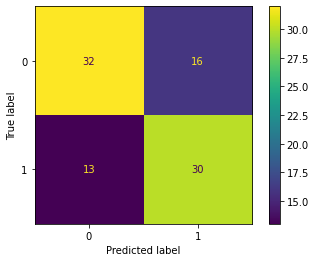

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))
metrics.plot_confusion_matrix(clf, X_test, y_test)

Here is a way to calculate the accuracy of the model and summarize it in one value. 

In [ ]:
acc = round(100 * metrics.accuracy_score(y_test, y_pred),2)
print("Accuracy:",acc,"%")

Accuracy: 68.13 %


#Assignment 3: false and true positives and negatives 
Have a look at this [video](https://www.youtube.com/watch?v=Ivc8c9ijWIQ).
Now look at your confusion matrix. 
1. How many true and false positives and negatives did your model generate? 

2. Use code with np.count_nonzero and np.logical_and to determine the number of false positives. Paste the code in your report. 

3. For what percentage of patients did you predict that they were fine, but really they did have a constricted vessel? Are these false positives or false negatives?

4. Look at the class [notes](https://docs.google.com/document/d/1TjrEe7RbzQYZgucPjfZMARCCk9kIkNQMoczfu0YR4ss/edit?usp=sharing) to learn about safety and efficiency – calculate safety and efficiency for the decision tree. Include a picture of your confusion matrix (may not be the same as for others).

#Visualizing the decision tree. 

This is a to do item for Pleuni, but if someone would like to figure it out, that'd be great! TO DO: Need to print a better visualization - https://mljar.com/blog/visualize-decision-tree/

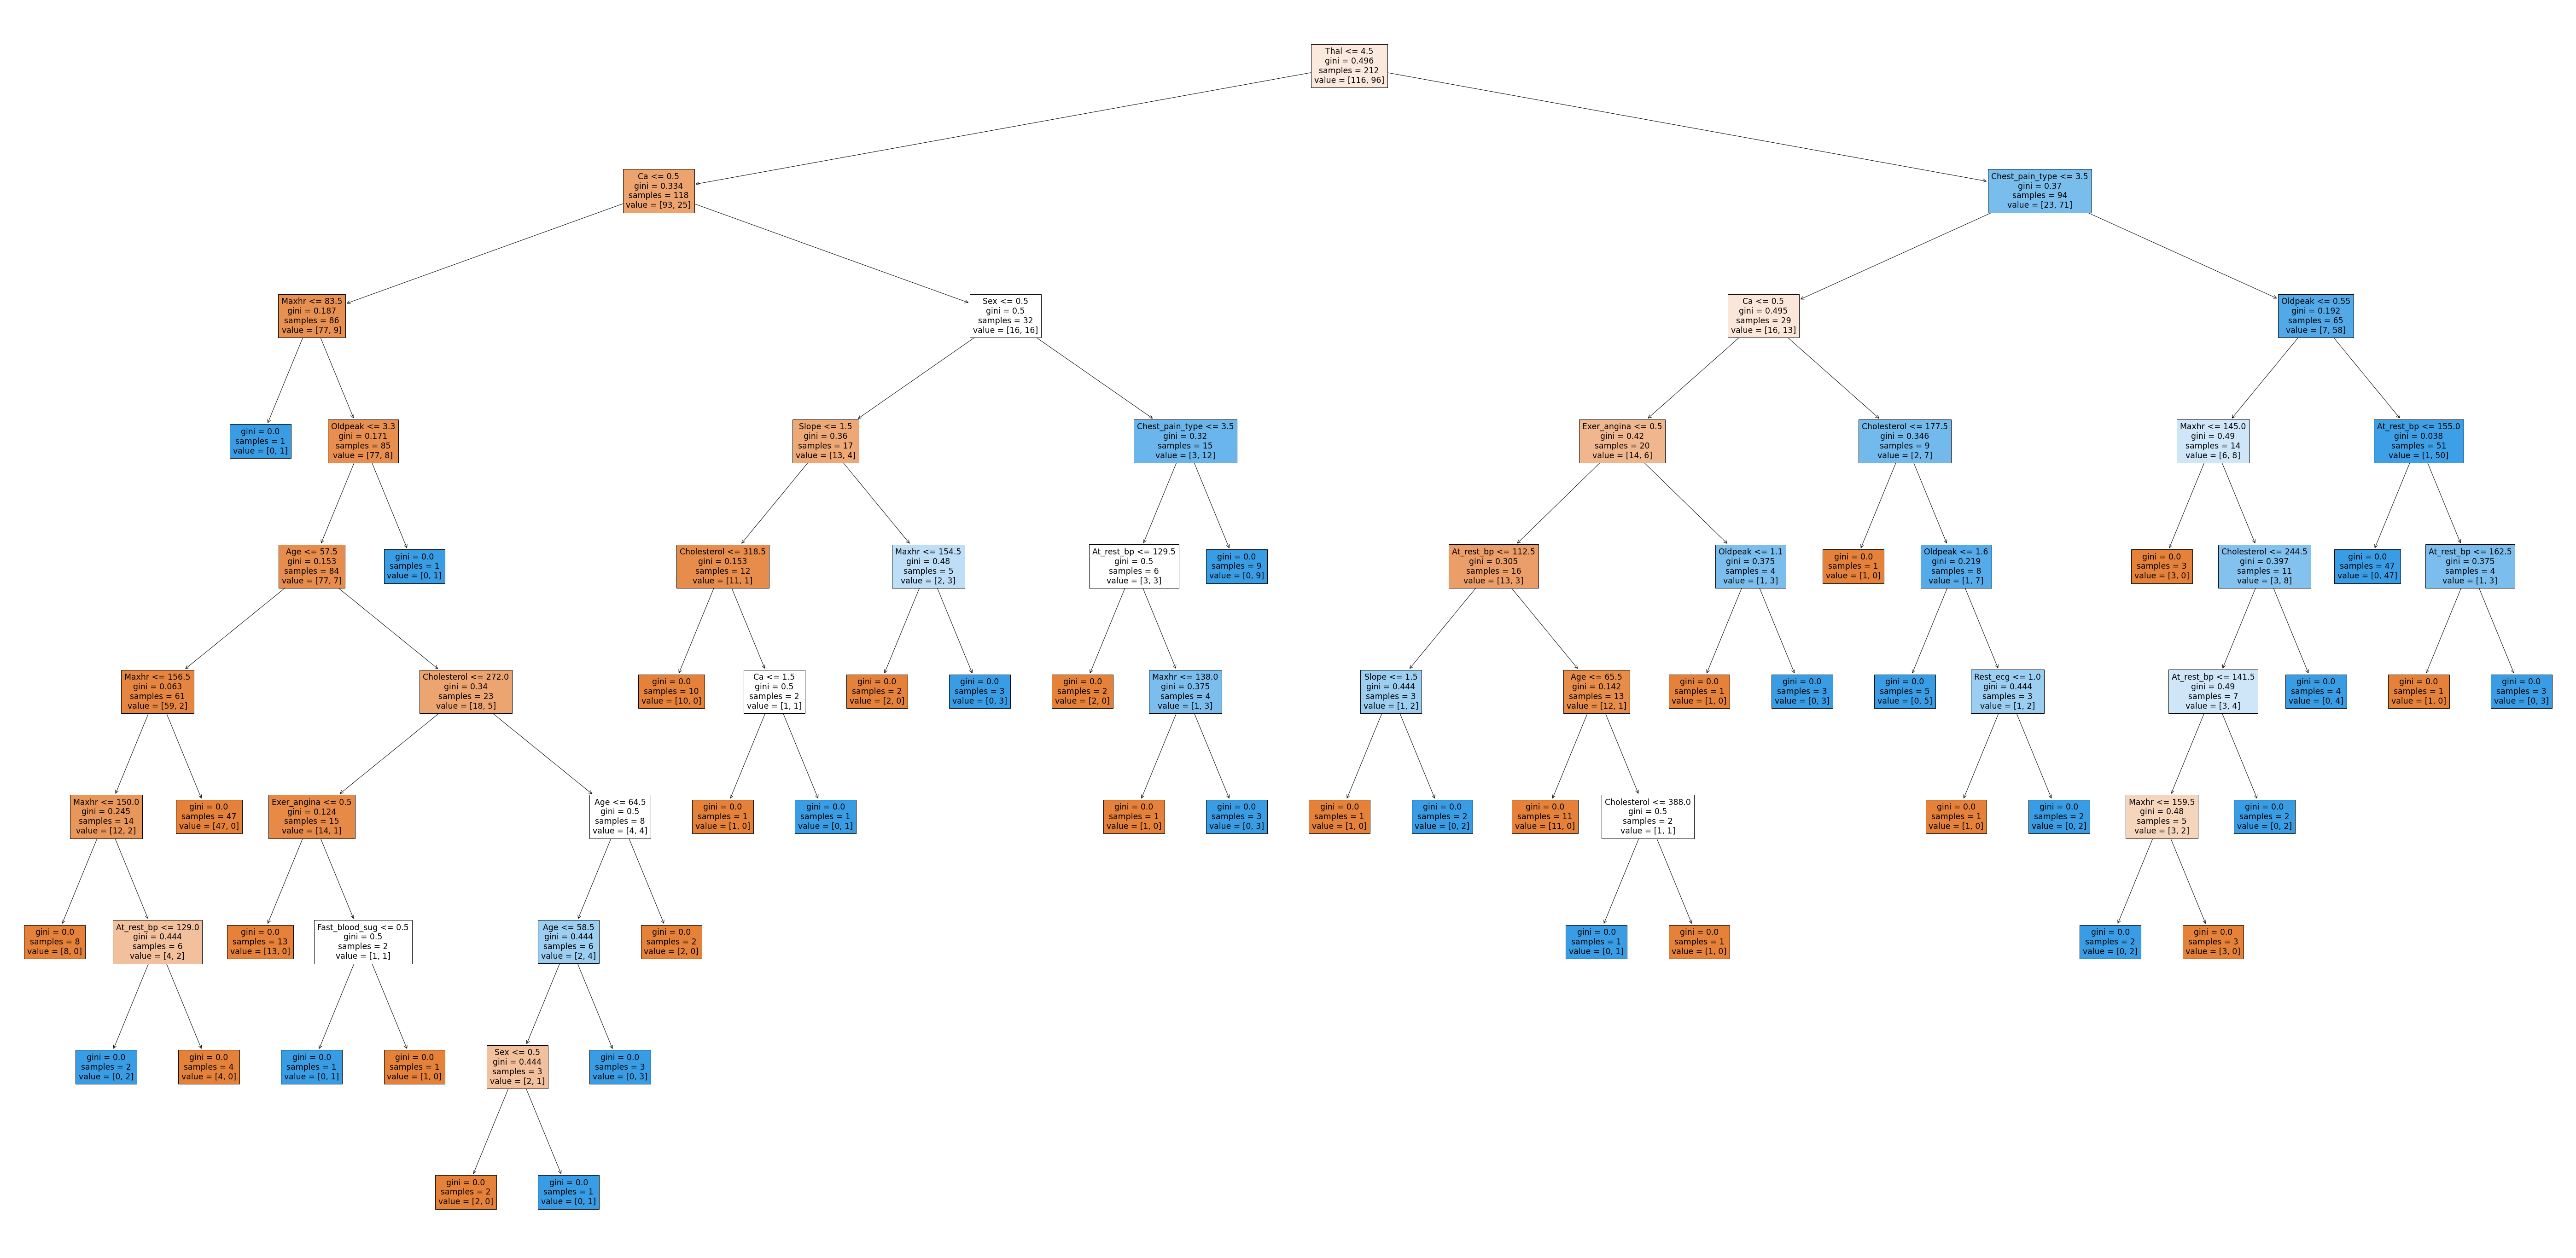

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(100,50))
_ = tree.plot_tree(clf, 
                   feature_names=features.columns,  
                   filled=True)

The first node of our decision tree looks at the Thal (Thallium test) – if the patient has a value less than 4.5 (that is the test value was 3, normal) then we go to the left of the tree. If the value was higher than 4.5, we go to the right of the tree. 

Here I decided to plot the distribution of Thal values for the different Diag values. What do you notice? Do you agree with the decision tree that the Thallium test may be a good way to start triaging of patients?

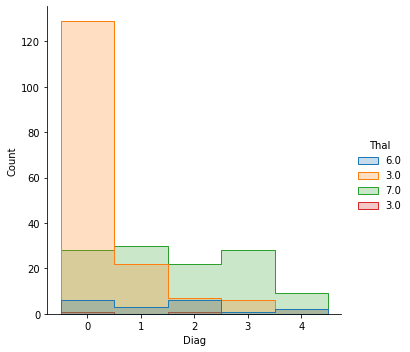

In [ ]:
    import seaborn as sns
#    sns.violinplot('Thal', 'Diag', data=features,  size=5, jitter = 1.05) 
    sns.displot(data=data, x="Diag", hue = "Thal", bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5], element="step")
    sns.despine()

#Assignment 4 - final thoughts

1. Look at the print of the decision tree. What is the second node on the tree on the left and on the right? 
2. Why do you think the second node left and the second node on the right are not the same? 
3. Look at some of the nodes that contain age as a variable. What do you notice? Did you expect to see that?
4. Do you think the decision tree we created would be useful for doctors in the ER? Think of one reason why it would be and one reason why it wouldn't be useful. 
5. Write down one thing you learned today and one thing that confuses you. (I know, I ask this all the time, but it is important to think about it for a few seconds!) 
6. Congratulations! You are on your way to mastering machine learning :-) Give yourself a pat on the back and be proud (even if you feel like some of this is still confusing!). 

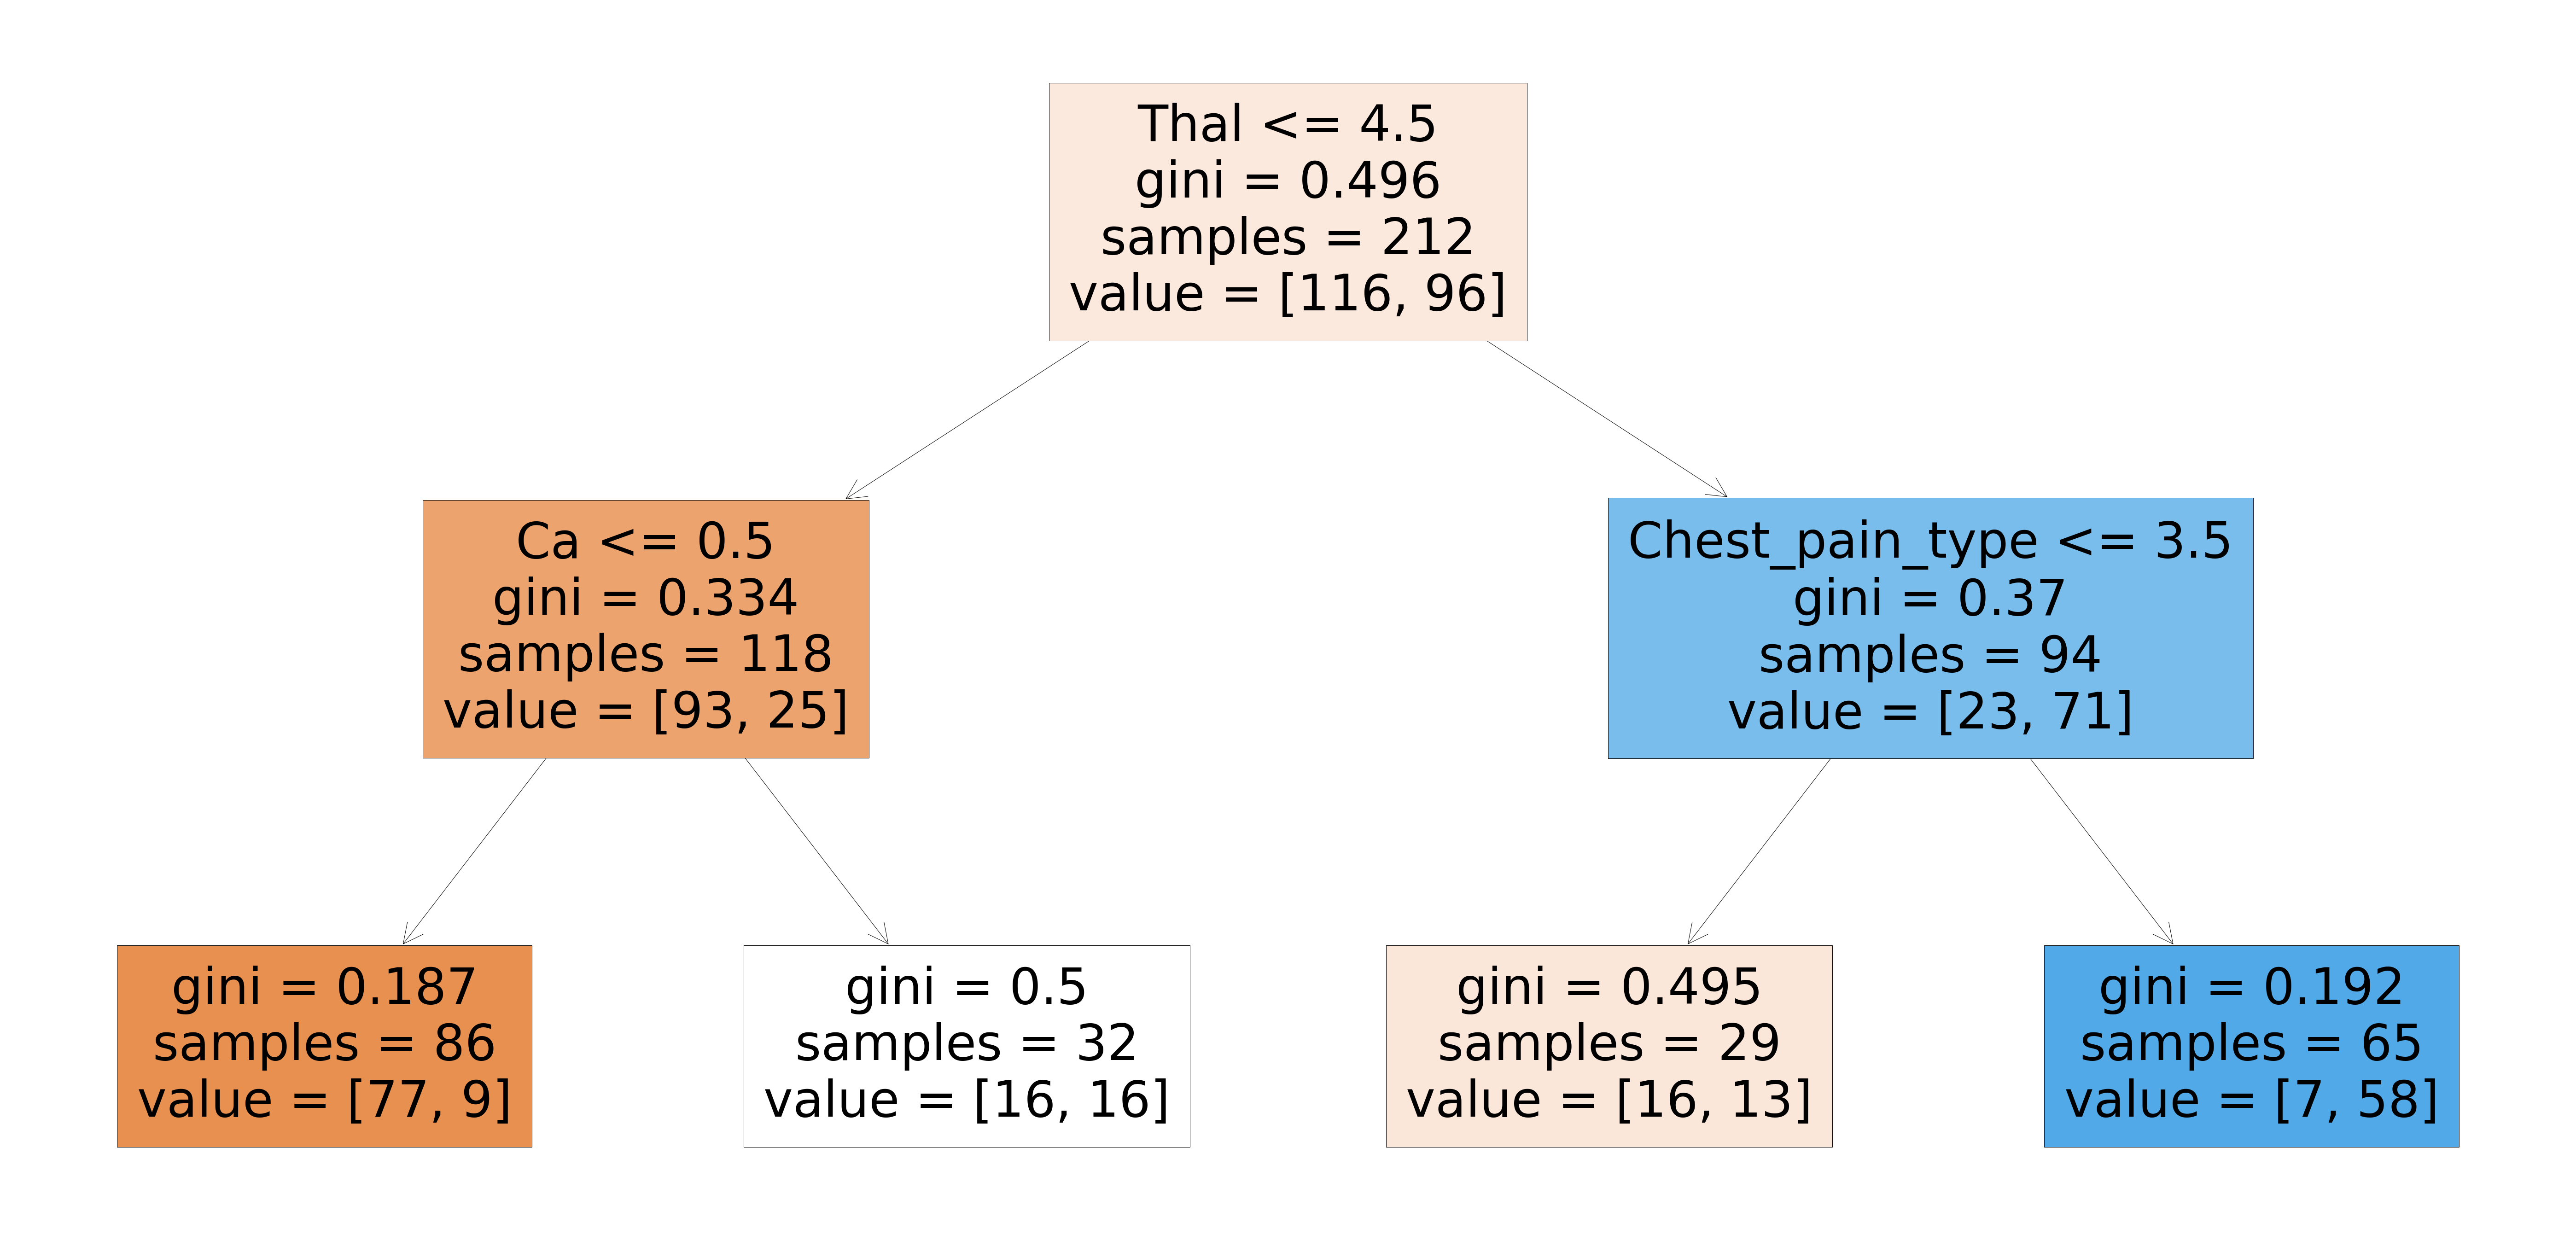

In [ ]:
# Train Decision Tree Classifer
clf_3 = DecisionTreeClassifier(max_depth = 2)
clf_3 = clf_3.fit(X_train,y_train)
fig = plt.figure(figsize=(100,50))
_ = tree.plot_tree(clf_3, 
                   feature_names=features.columns,  
                   filled=True)

In [ ]:
data_small = data[['Thal', 'Ca', 'Diag', 'Age','Sex']]
data_small[['Thal']]= data_small[['Thal']].astype(np.float64)
data_small[['Ca']]= data_small[['Thal']].astype(np.float64)
data_small.dtypes

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Thal    float64
Ca      float64
Diag      int64
Age     float64
Sex     float64
dtype: object